In [135]:
import numpy as np                                                     #importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width',500)
pd.set_option('display.max_colwidth',500)

In [136]:
data=pd.read_csv("/content/Melbourne_housing_FULL.csv")       #Loading the Data

In [137]:
data.head(2)                                             #displying two rows of data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


#Exploring the dataset

In [138]:
data.shape    

(34857, 21)

In [139]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'], dtype='object')

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [141]:
# Describing the statical information

data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


Text(0.5, 1.0, 'Variable Correlation')

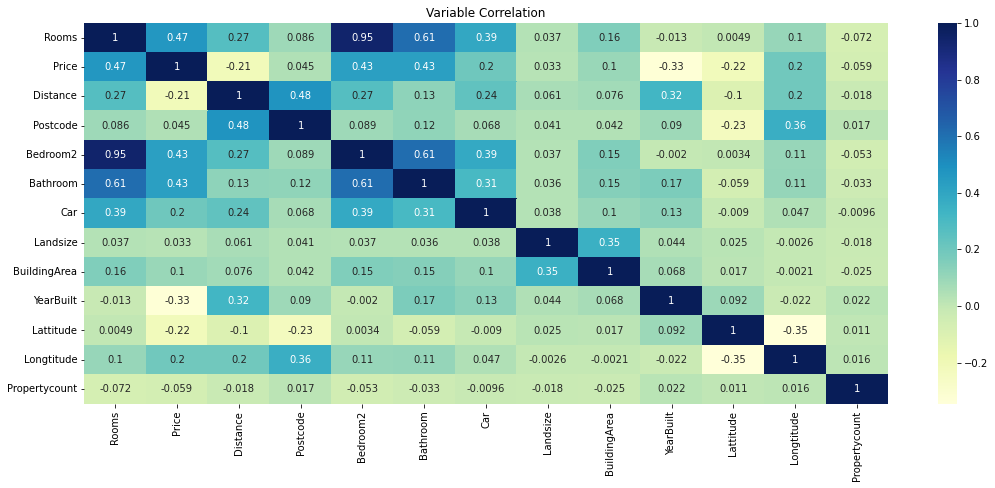

In [142]:
#Correlation Insights

plt.figure(figsize = (18,7))
sns.heatmap(data.corr(), cmap = 'YlGnBu', annot = True )   #annot_kws = {'size':9} , linewidth = 1,
plt.title('Variable Correlation')

In [143]:
print("Missing values of each column")                               #Checking missing values
print("-"*30)
print(data.isna().sum())

Missing values of each column
------------------------------
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


In [144]:
print("Total missing values:",data.isna().sum().sum())                #Checking total missing values

Total missing values: 100975


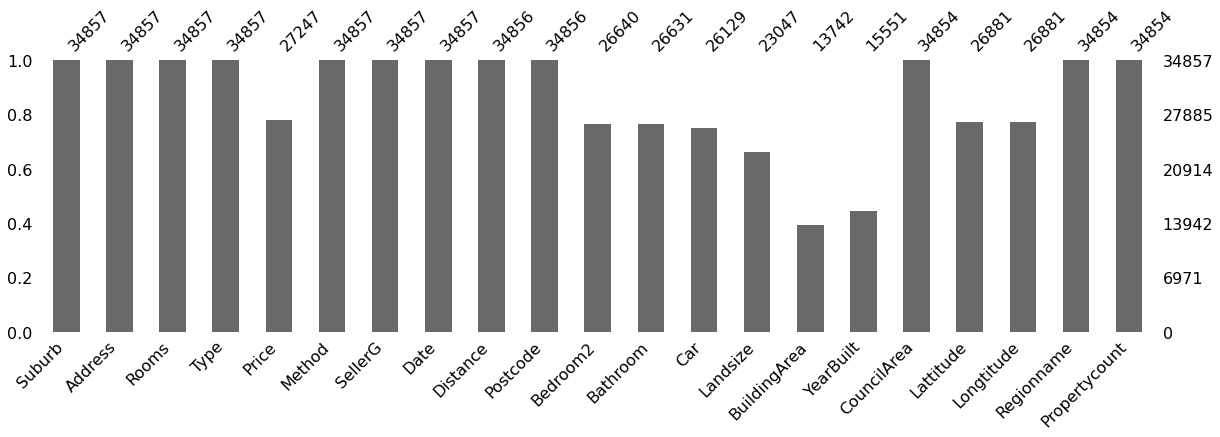

In [145]:
msno.bar(data,figsize=(20,5));                                   #missing values plot

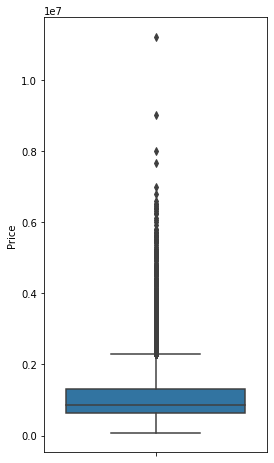

In [146]:
plt.figure(figsize = (4,8))                   
sns.boxplot(y = data.Price);

In [147]:
data['Price'].fillna(data['Price'].median(), inplace = True)                           #imputing missing values 
data['Distance'].fillna(data['Distance'].mean(), inplace = True)
data['Postcode'].fillna(data['Postcode'].median(), inplace = True)

In [148]:
data.Bedroom2.value_counts()                           #counting no. of bedrooms 

3.0     11881
4.0      6348
2.0      5777
5.0      1427
1.0       966
6.0       168
7.0        30
0.0        17
8.0        13
9.0         5
10.0        4
30.0        1
20.0        1
16.0        1
12.0        1
Name: Bedroom2, dtype: int64

In [149]:
data.Bathroom.value_counts()                  ##counting NO. of bathrooms

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
12.0        1
9.0         1
Name: Bathroom, dtype: int64

In [150]:
#imputing missng values by assuming every house have minimum 1 bedroom and bathroom . Instead of dropping them I will be fill with ones.

data['Bathroom'].fillna(1, inplace= True)    
data['Bedroom2'].fillna(1, inplace= True)

Type of houses available in Melbourne Area according to this dataset

In [151]:
data.Type.value_counts(dropna=False).to_frame()

,Type
h,23980
u,7297
t,3580


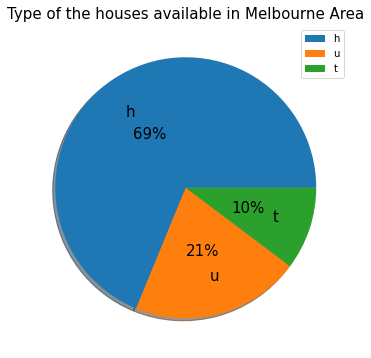

In [152]:
plt.figure(1, figsize=(6,6))
textprops = {"fontsize":15}
plt.title('Type of the houses available in Melbourne Area',fontsize=15)
plt.pie(data.Type.value_counts(dropna=False), labels=['h','u','t'],autopct='%1.0f%%', pctdistance=.5, labeldistance=.7,textprops =textprops,shadow = True,)
plt.legend();

Most frequent available car parking spaces for each type of houses

In [153]:
# h - house
type_h=data.loc[(data['Type'] == 'h') ,['Type','Car']]
type_h.head(5)
type_h.Car.value_counts()[:2]

2.0    10436
Name: Car, dtype: int64

In [154]:
#u - unit, duplex;
type_u=data.loc[(data['Type'] == 'u') ,['Type','Car']]
type_u.Car.value_counts()[:2]

1.0    3252
2.0     720
Name: Car, dtype: int64

In [155]:
 #t - townhouse
type_t=data.loc[(data['Type'] == 't') ,['Type','Car']]
type_t.Car.value_counts()[:2]

2.0    1058
Name: Car, dtype: int64

Most expensive house in Melbourne Area

In [156]:
most_exp=pd.DataFrame(data.groupby('Type')['Price'].max()).reset_index().sort_values(by='Price', ascending=False).reset_index().drop('index',axis=1)
most_exp.head()

,Type,Price
0,h,11200000.0
1,u,6500000.0
2,t,3820000.0


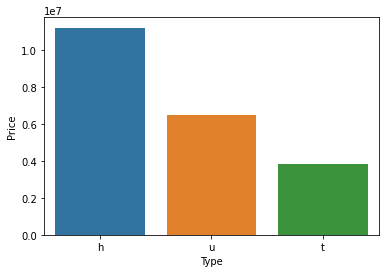

In [157]:
sns.barplot(y='Price', x='Type', data=most_exp[:10]);

Region names of Melbourne Area

In [158]:
data.Regionname.value_counts()

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

Top 10 Most largest landsize of Houses in Melbourne Area

In [159]:
houses=data.loc[data.Type == 'h', :].sort_values('Landsize')
houses.Landsize.value_counts().to_frame().head(10)

,Landsize
0.0,222
650.0,200
697.0,122
585.0,97
700.0,86
604.0,82
696.0,80
534.0,79
652.0,67
600.0,67


Top 10 Most largest landsize of Town houses in Melbourne Area

In [160]:
townhouses=data.loc[data.Type == 't', :].sort_values('Landsize')
townhouses.Landsize.value_counts().to_frame().head(10)

,Landsize
0.0,179
158.0,12
217.0,9
184.0,9
200.0,9
219.0,9
300.0,8
215.0,8
224.0,8
159.0,8


Top 10 Most largest landsize of unit, duplex in Melbourne Area

In [161]:
unit=data.loc[data.Type == 'u', :].sort_values('Landsize')
unit.Landsize.value_counts().to_frame().head(10)

,Landsize
0.0,2036
132.0,11
180.0,10
217.0,9
153.0,9
166.0,9
112.0,8
205.0,8
138.0,8
143.0,8


In [162]:
data['Car'].fillna(data['Car'].mean(), inplace = True)
data['Landsize'].fillna(data['Landsize'].median(), inplace = True)
data['BuildingArea'].fillna(data['BuildingArea'].mean(), inplace = True)
data['YearBuilt'].fillna(data['YearBuilt'].mean(), inplace = True)

In [163]:
data['CouncilArea'].value_counts(dropna=False)

Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston City Council   

Checking missing values for councilArea

In [164]:
data.loc[(data['CouncilArea'].isna()) ,['Postcode','CouncilArea','Regionname']]

,Postcode,CouncilArea,Regionname
18523,3011.0,NaN,NaN
26888,3124.0,NaN,NaN
29483,3103.0,NaN,NaN


In [165]:
#Selecting the dataframe that match postcode with missing values
ps_3011=data.loc[(data['Postcode']==3011 )]
print("Council Area based on postcode 3011 is ",ps_3011.CouncilArea.value_counts()[:1])
print("Region name based on postcode 3011 is ",ps_3011.Regionname.value_counts()[:1])

Council Area based on postcode 3011 is  Maribyrnong City Council    374
Name: CouncilArea, dtype: int64
Region name based on postcode 3011 is  Western Metropolitan    374
Name: Regionname, dtype: int64


In [166]:
ps_3124=data.loc[(data['Postcode']==3124 )]
print("Council Area based on postcode 3011 is ",ps_3124.CouncilArea.value_counts()[:1])
print("Region name based on postcode 3011 is ",ps_3124.Regionname.value_counts()[:1])

Council Area based on postcode 3011 is  Boroondara City Council    422
Name: CouncilArea, dtype: int64
Region name based on postcode 3011 is  Southern Metropolitan    422
Name: Regionname, dtype: int64


In [167]:
ps_3103=data.loc[(data['Postcode']==3103 )]
print("Council Area based on postcode 3011 is ",ps_3103.CouncilArea.value_counts()[:1])
print("Region name based on postcode 3011 is ",ps_3103.Regionname.value_counts()[:1])

Council Area based on postcode 3011 is  Boroondara City Council    330
Name: CouncilArea, dtype: int64
Region name based on postcode 3011 is  Southern Metropolitan    330
Name: Regionname, dtype: int64


Replacing missing values of ConcilArea based on Postcode

In [168]:
data.loc[(data['CouncilArea'].isna()) & (data['Postcode']==3011) , 'CouncilArea'] = "Maribyrnong City Council"
data.loc[(data['CouncilArea'].isna()) & (data['Postcode']==3124) , 'CouncilArea'] = "Boroondara City Council"
data.loc[(data['CouncilArea'].isna()) & (data['Postcode']==3103) , 'CouncilArea'] = "Boroondara City Council"

Replacing missing values of Regionname based on Postcode

In [169]:
data.loc[(data['Regionname'].isna()) & (data['Postcode']==3011) , 'Regionname'] = "Western Metropolitan"
data.loc[(data['Regionname'].isna()) & (data['Postcode']==3124) , 'Regionname'] = "Southern Metropolitan"
data.loc[(data['Regionname'].isna()) & (data['Postcode']==3103) , 'Regionname'] = "Southern Metropolitan"

In [170]:
data.sample(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
14177,Toorak,6/696 Orrong Rd,2,u,750000.0,PI,Williams,20/05/2017,4.6,3142.0,2.0,1.0,1.000000,0.0,160.2564,1970.000000,Stonnington City Council,-37.84320,145.01370,Southern Metropolitan,7217.0
22145,Wheelers Hill,77 Jells Rd,4,h,1250000.0,VB,Jellis,19/08/2017,16.7,3150.0,4.0,2.0,3.000000,521.0,245.0000,1980.000000,Monash City Council,-37.89953,145.19021,South-Eastern Metropolitan,7392.0
273,Altona,12 Ransom Av,3,h,685000.0,S,Barlow,25/02/2017,13.8,3018.0,1.0,1.0,1.728845,521.0,160.2564,1965.289885,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,5301.0


Forward Fill For Lattitude and Longtitude

In [171]:
data['Lattitude'].fillna(method = 'ffill', inplace = True)
data['Longtitude'].fillna(method = 'ffill', inplace = True)

In [172]:
data.loc[(data['Propertycount'].isna()) ,['Landsize','Price','Type']]

,Landsize,Price,Type
18523,521.0,710000.0,u
26888,521.0,825000.0,h
29483,521.0,616000.0,h


In [173]:
data.iloc[18521:18525]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18521,Footscray,27 Leander St,2,h,991000.0,S,Village,15/07/2017,5.1,3011.0,2.0,1.0,1.000000,318.0,106.0000,1910.000000,Maribyrnong City Council,-37.79529,144.88453,Western Metropolitan,7570.0
18522,Footscray,305/21 Moreland St,3,u,870000.0,W,McGrath,15/07/2017,5.1,3011.0,3.0,2.0,2.000000,4096.0,103.0000,2012.000000,Maribyrnong City Council,-37.80210,144.90750,Western Metropolitan,7570.0
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,1.0,1.0,1.728845,521.0,160.2564,1965.289885,Maribyrnong City Council,-37.80210,144.90750,Western Metropolitan,NaN
18524,Forest Hill,35 Panorama Dr,4,h,945000.0,S,Ray,15/07/2017,15.4,3131.0,4.0,2.0,2.000000,294.0,194.0000,2010.000000,Whitehorse City Council,-37.85156,145.16923,Eastern Metropolitan,4385.0


In [174]:
data.iloc[26886:26890]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
26886,Camberwell,18 Cochran Av,3,h,3010000.0,S,Woodards,11/11/2017,7.7,3124.0,3.0,1.0,2.000000,835.0,160.2564,1965.289885,Boroondara City Council,-37.8398,145.0580,Southern Metropolitan,8920.0
26887,Camberwell,1A Gavan St,3,h,870000.0,SP,Jellis,11/11/2017,7.7,3124.0,3.0,1.0,2.000000,521.0,139.0000,1955.000000,Boroondara City Council,-37.8479,145.0955,Southern Metropolitan,8920.0
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,1.0,1.0,1.728845,521.0,160.2564,1965.289885,Boroondara City Council,-37.8479,145.0955,Southern Metropolitan,NaN
26889,Camberwell,1/12 Nelson Rd,3,h,1665000.0,S,Jellis,11/11/2017,7.7,3124.0,1.0,1.0,1.728845,521.0,160.2564,1965.289885,Boroondara City Council,-37.8479,145.0955,Southern Metropolitan,8920.0


In [175]:
data['Propertycount'].fillna(method = 'ffill', inplace = True)

In [176]:
print("-"*30)
print("Missing values of each column")
print("-"*30)
print(data.isna().sum())
print("-"*30)
print("Total missing values:",data.isna().sum().sum())

------------------------------
Missing values of each column
------------------------------
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64
------------------------------
Total missing values: 0


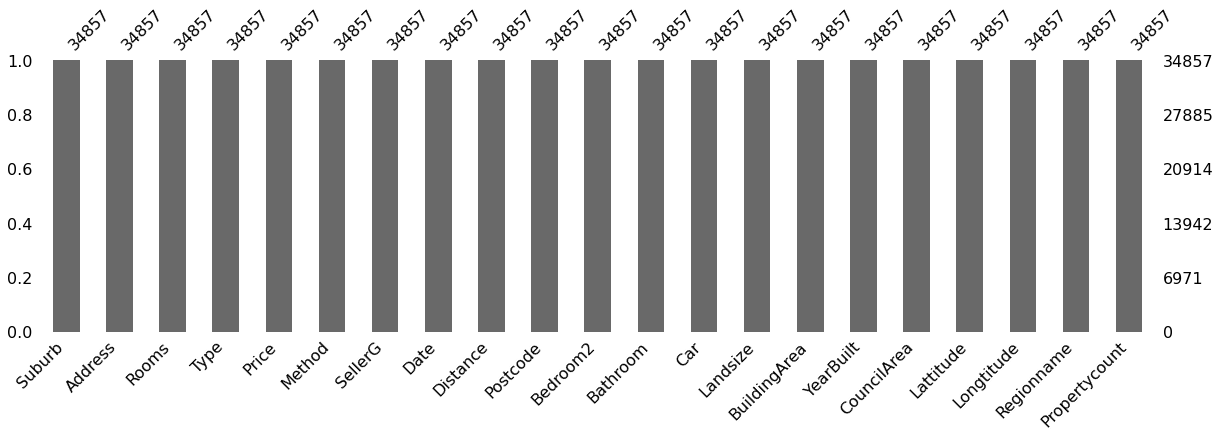

In [179]:
msno.bar(data,figsize=(20,5))

In [178]:
data.sample(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
31474,Beaumaris,14 Cannes Gr,4,h,1645000.0,S,Bayside,3/03/2018,17.3,3193.0,4.0,2.0,2.0,646.0,260.0,2006.000000,Bayside City Council,-37.97559,145.04546,Southern Metropolitan,5366.0
19563,Mill Park,2 Mimosa Rd,2,h,490000.0,S,Stockdale,29/07/2017,17.9,3082.0,2.0,1.0,2.0,374.0,100.0,1965.289885,Whittlesea City Council,-37.67450,145.05491,Northern Metropolitan,10529.0


All possible Categorical Columns to Dummy Columns by using the get_dummies() from Pandas

In [180]:
data_ = data.copy()

data_ = pd.get_dummies(data_,
                     columns = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG','CouncilArea', 'Regionname'])
  
data_.head()

,Address,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Avonsleigh,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Botanic Ridge,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulla,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Clyde North,Suburb_Coburg,Suburb_Coburg North,Suburb_Coldstream,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne East,Suburb_Cranbourne North,Suburb_Cranbourne West,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Darley,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Eumemmerring,Suburb_Eynesbury,Suburb_Fairfield,Suburb_Fawkner,Suburb_Fawkner Lot,Suburb_Ferntree Gully,Suburb_Ferny Creek,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gisborne South,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Guys Hill,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heatherton,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hopetoun Park,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kalkallo,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Laverton,Suburb_Lilydale,Suburb_Lower Plenty,Suburb_Lynbrook,Suburb_Lysterfield,Suburb_MacLeod,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,

#Linear Regression Model

In [181]:
#Split the data into Train, Test set

X = data_.drop(['Price','Address','Date'],axis=1) # Features
y=data_['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#70 % training and 30% testing

In [182]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [183]:
y_pred = model.predict(X_test)                     #Predicting test set

In [184]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

120254730579.76535


In [186]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))          #Evaluating our model with RMSE

120254730579.76535


In [185]:
df= pd.DataFrame({'Actual_Price': np.round(y_test), 
                   'Predicted_Price': np.round(y_pred),
                 })
df['difference']=df.apply(lambda x: x.Predicted_Price-x.Actual_Price,axis=1)
df.head(10)

,Actual_Price,Predicted_Price,difference
10953,955000.0,1113663.0,158663.0
29454,411000.0,444068.0,33068.0
21866,875000.0,1118788.0,243788.0
5673,746000.0,866106.0,120106.0
22924,1250000.0,1128990.0,-121010.0
32052,950000.0,1006099.0,56099.0
33732,960000.0,832589.0,-127411.0
26658,801000.0,779438.0,-21562.0
21680,1740000.0,1529518.0,-210482.0
12148,690000.0,1046713.0,356713.0
